<a href="https://colab.research.google.com/github/GeetanjaliWadhwa/LGMVIP-DS-ImagetoPencilSketch/blob/main/RGB_to_Pencil_Sketch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **IMAGE TO PENCIL SKETCH WITH PYTHON**

TASK 4: BEGINNER LEVEL

LGMVIP DATA SCIENCE INTERNSHIP

**BY: Geetanjali**

First, we need to read the image in RBG format and then convert it to a grayscale image. This will turn an image into a classic black and white photo.


Then the next thing to do is invert the grayscale image also called negative image, this will be our inverted grayscale image. Inversion can be used to enhance details.

Then we can finally create the pencil sketch by mixing the grayscale image with the inverted blurry image. This can be done by dividing the grayscale image by the inverted blurry image. Since images are just arrays, we can easily do this programmatically using the divide function from the cv2 library in Python.

In [2]:
#to access files directly from google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [1]:
#OpenCV-Python is a library of Python bindings designed to solve computer vision problems. 
#OpenCV releases two types of Python interfaces, cv and cv2 . latest one is cv2 .
import cv2
%matplotlib inline
from google.colab.patches import cv2_imshow   
#google colab doesn't support cv2.imshow

To display the image at every step to see the changes in the image then you need to use two commands; cv2.imshow(“Title You want to give”, Image) and then simply write cv2.waitKey(0). This will display the image.

(Not for google colab)




**Now the next thing to do is to read the image:**

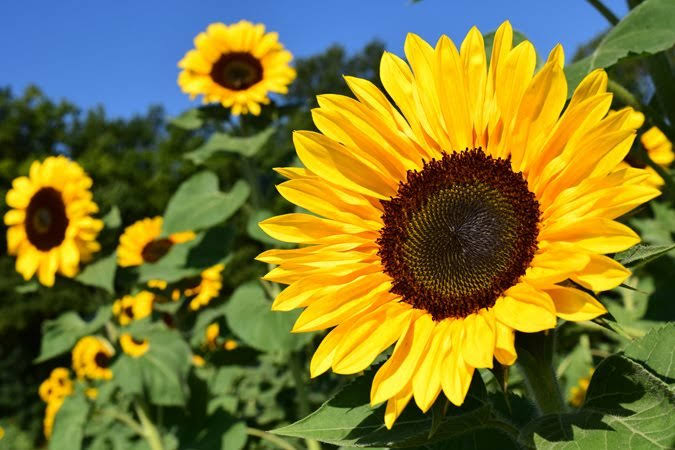

In [3]:
image = cv2.imread('/content/drive/MyDrive/Colab Notebooks/Sunflowers.JPG')  #used for reading the images from a file path
cv2_imshow(image)  #display the image

cv2.waitKey(0)
#waitKey() returns an int. This is supposed to be the ASCII value of the key pressed. 
#This function is very important, without this function cv2.imshow() won’t work properly.
#Parameters: cv2.waitkey(wait time in milliseconds)
#Thus if the wait time is entered as 6000, the picture will be displayed for 6s and then get closed 
#(provided you have cv2.destroyAllWindows() in the script). 
#If you use ‘0’ as the parmater then the image will be displayed for infinite time until you press the esc key.

cv2.destroyAllWindows()
#This method destroys (in other words “closes”) all the windows created using the opencv methods. 
#If you want to close a specific window, then you can pass the window name as the argument within this function.
#Missing to provide the cv2.destroyAllWindows() at the end of the script might make the window opened to crash

**Now after reading the image, we will create a new image by converting the original image to greyscale:**

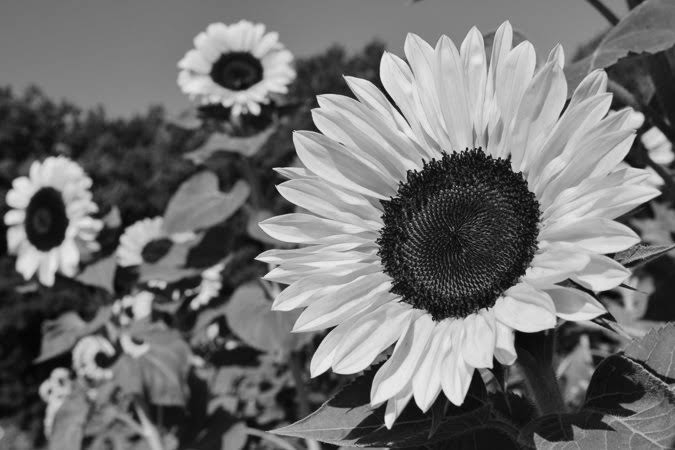

In [4]:
#cvtColor can be interpreted as convert color and this method is used for converting the image from one color space to another color space.
grey = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
cv2_imshow(grey)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [7]:
import numpy as np

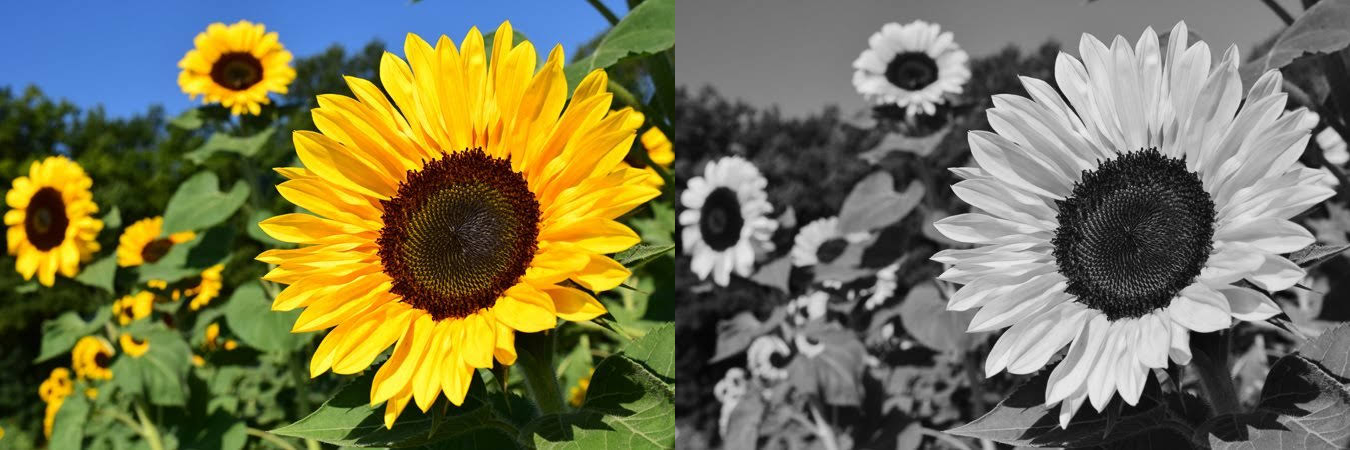

-1

In [8]:
# Make the grey scale image have three dimensions
gray_image= cv2.cvtColor(grey, cv2.COLOR_GRAY2BGR)

numpy_horizontal = np.hstack((image, gray_image))

numpy_horizontal_concat = np.concatenate((image, gray_image), axis=1)

cv2_imshow(numpy_horizontal_concat)
cv2.waitKey()

**Now the next step is to create a negative of image or invert the new grayscale image:**

METHOD 1






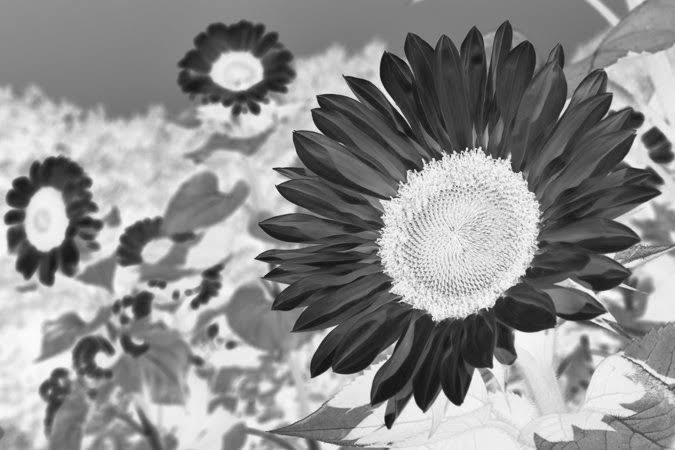

In [9]:
#Image negative is produced by subtracting each pixel from the maximum intensity value. 
#e.g. for an 8-bit image, the max intensity value is 28– 1 = 255, thus each pixel is subtracted from 255 to produce the output image.
#For grayscale images, light areas appear dark and vice versa. For color images, colors are replaced by their complementary colors. 
#Thus, red areas appear cyan, greens appear magenta, and blues appear yellow, and vice versa.
inverted_image = 255 - gray_image
cv2_imshow(inverted_image)
cv2.waitKey(0)
cv2.destroyAllWindows()

METHOD 2

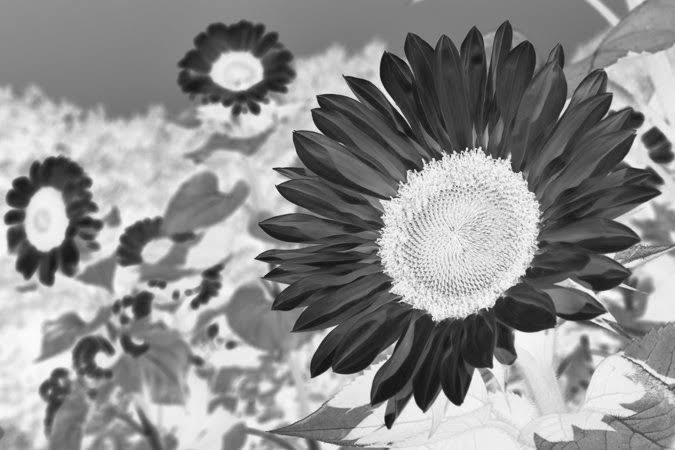

In [10]:
#OpenCV provides a built-in function cv2.bitwise_not() that inverts every bit of an array. 
#This takes as input the original image and outputs the inverted image. Below is the code for this.

img_neg= cv2.bitwise_not(gray_image)
cv2_imshow(img_neg)
cv2.waitKey(0)
cv2.destroyAllWindows()

**Now the next step in the process is to blur the image by using the Gaussian Function in OpenCV:**

In [11]:
#to apply Gaussian Smoothing on the input source image.
blurred = cv2.GaussianBlur(inverted_image, (21, 21), 0)

**Syntax:**
 
cv2.GaussianBlur(src, ksize, sigmaX, sigmaY, borderType)
 
**Parameters:**

**src:** Source/Input of n-dimensional array.

**ksize:** Kernal is matrix of an (no. of rows)*(no. of columns) order .Its Size is given in the form of tuple (no. of rows, no. of columns). no. of rows and no. of columns should be odd .If ksize is given as (0 0), then ksize is computed from given sigma values i.e. sigmaX and sigmaY.

**sigmaX:** Standard deviation value of kernal along horizontal direction.

**sigmaY:** Standard deviation value of kernal along vertical direction.

**borderType:** This specify boundaries of an image while kernel is applied on borders of an image.
Possible values of borderType are :

cv2.BORDER_CONSTANT, cv2.BORDER_REPLICATE, cv2.BORDER_REFLECT, cv2.BORDER_WRAP, cv2.BORDER_REFLECT_101, cv2.BORDER_TRANSPARENT, cv2.BORDER_REFLECT101, cv2.BORDER_DEFAULT

Result:

a) In GaussianBlur() method, you need to pass src and ksize values everytime and either one, two, or all parameters value from remaining sigmax, sigmaY and borderType parameter should be passed.

b) Both sigmaX and sigmaY parameters become optional if you mention the ksize(kernal size) value other than (0,0).

**Then the final step is to invert the blurred image, then we can easily convert the image into a pencil sketch:**

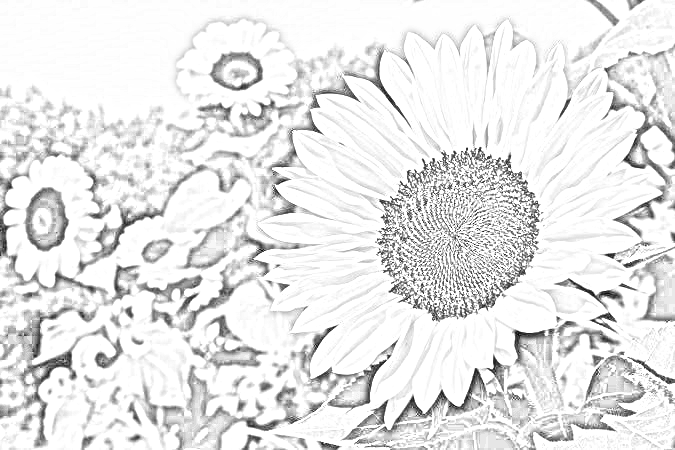

In [12]:
inverted_blurred = 255 - blurred
pencil_sketch = cv2.divide(gray_image, inverted_blurred, scale=256.0)
cv2_imshow(pencil_sketch)
cv2.waitKey(0)
cv2.destroyAllWindows()

**And finally, if you want to have a look at both the original image and the pencil sketch then you can use the following commands:**

In [13]:
!pip install quo
from quo import echo

     |████████████████████████████████| 492 kB 33.9 MB/s 



 ORIGINAL IMAGE



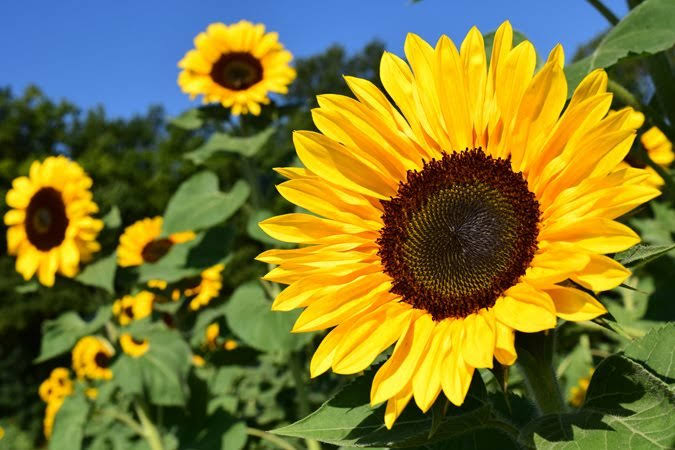


PENCIL SKETCH 



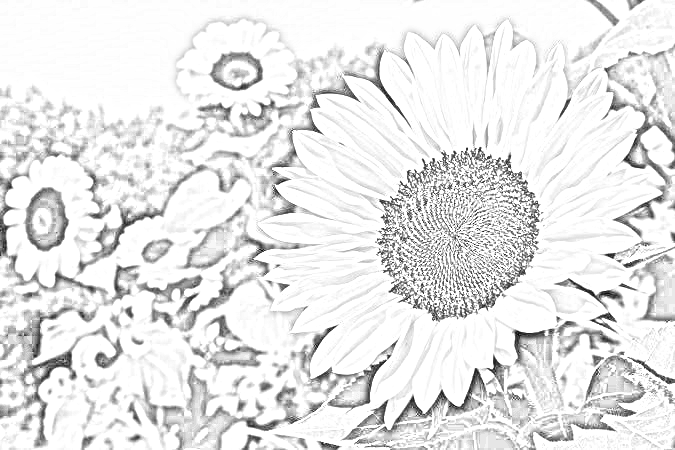

In [14]:
echo(f"\n ORIGINAL IMAGE\n",bold=True,underline=True)
cv2_imshow(image)
echo(f"\nPENCIL SKETCH \n", bold=True, underline=True)
cv2_imshow(pencil_sketch)
cv2.waitKey(0)
cv2.destroyAllWindows()

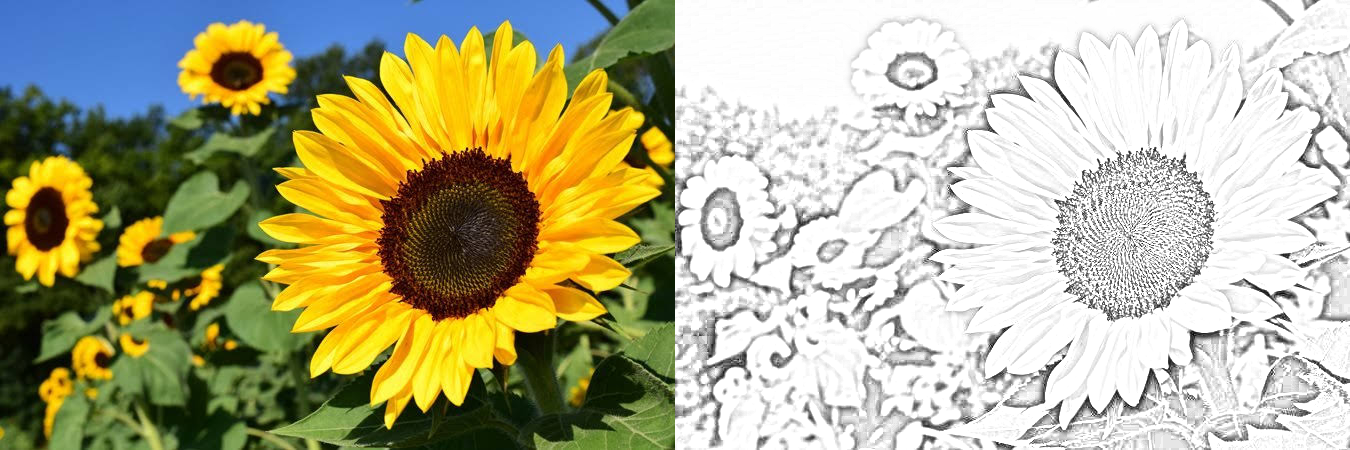

In [16]:

numpy_horizontal = np.hstack((image, pencil_sketch))
numpy_horizontal_concat = np.concatenate((image, pencil_sketch), axis=1)

cv2_imshow( numpy_horizontal_concat)

cv2.waitKey()
cv2.destroyAllWindows()